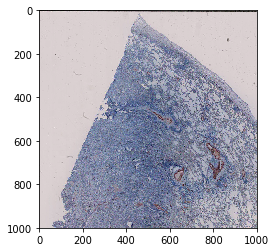

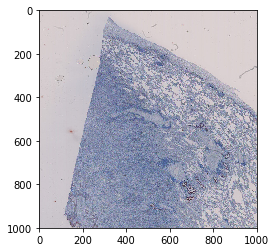

In [20]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# cp -r HistokatController /usr/local/anaconda3/lib/python3.6/site-packages/histokat/backend/lib
# cd /usr/local/anaconda3/lib/python3.6/site-packages/histokat/backend/lib
# install_name_tool -add_rpath "@loader_path/HistokatController/lib" libHistokatController.dylib



tile_size = [1000, 1000]

def get_tile(image, level, x, y, z):
    # get correct level and position
    max_level = image.get_num_levels() - 1
    level = max_level - level
    x = tile_size[0] * x
    y = tile_size[1] * y
    region = [[x, y, z], [x + tile_size[0] - 1, y + tile_size[1] - 1, z]]
    # load tile as numpy array
    tile = image.open_region(level, region)[0]
    # normalize and convert to uint8 image
    tile *= (255.0/image.get_value_range().max)
    tile = Image.fromarray(tile.astype(np.uint8))
    return tile


import histokat

imageR = histokat.controller.open_session("/Users/jo/data/example-data-LL1_1_CD146-2014.tif").get_image()
imageT = histokat.controller.open_session("/Users/jo/data/example-data-LL1_4_KL1-2014.tif").get_image()
arr = get_tile(imageR, 10, 0,0,0)
plt.imshow(arr)
plt.show()

arr = get_tile(imageT, 10, 0,0,0)
plt.imshow(arr)
plt.show()